In [1]:
%matplotlib inline
from scipy import signal
from scipy.io import wavfile
import scipy.integrate
import IPython.display as ipyd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
minHz = 125
maxHz = 3000


# Comparison Files

In [3]:
def load_plot(path: str):
    #Load and display
    file_sample_rate, file_wav = wavfile.read(path)
    ipyd.display(ipyd.Audio(rate=file_sample_rate, data=file_wav))
    file_n = len(file_wav)

    #plot wav
    plt.figure(figsize=(4,2))
    plt.plot(np.linspace(0, file_n/file_sample_rate, file_n), file_wav)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

    # FFT
    plt.figure(figsize=(4,2))
    file_fft = np.fft.fft(file_wav)[minHz:maxHz]
    file_fft_n = len(file_fft)
    plt.plot(np.linspace(0, file_sample_rate*(file_fft_n - 1)/file_fft_n, file_fft_n), np.abs(file_fft))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()
    return file_sample_rate, file_wav, file_n, file_fft

In [4]:
def diff_fft(a: np.ndarray, b: np.ndarray, sample_rate: int) -> np.ndarray:

    # diff add
    plt.figure(figsize=(4,2))
    n = len(a)
    x = np.linspace(0, sample_rate*(n - 1)/n, n)
    curve = np.abs(np.abs(a)*4 - np.abs(b))
    plt.plot(x, curve)
    print(np.trapezoid(curve)/100000)

    plt.xlabel("Frequency")
    plt.ylabel("Difference")
    plt.show()

    plt.plot(x, np.abs(a))
    plt.plot(x, np.abs(b))

    idx = np.argwhere(np.diff(np.abs(a) - np.abs(b))).flatten()
    plt.plot(x[idx], np.abs(a)[idx], 'ro')

    plt.show()

    return idx


## Start

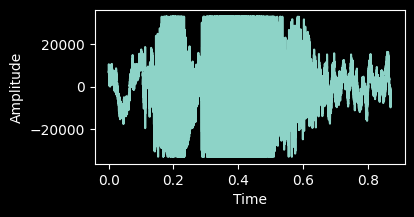

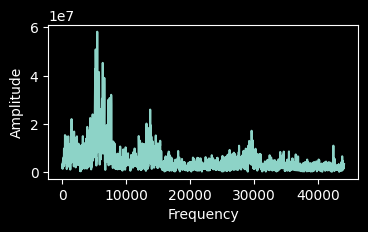

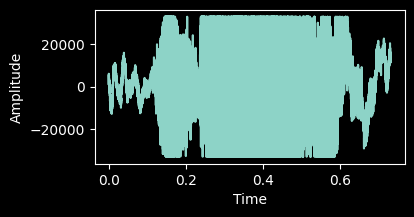

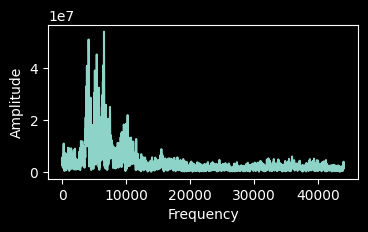

476279.1834743479


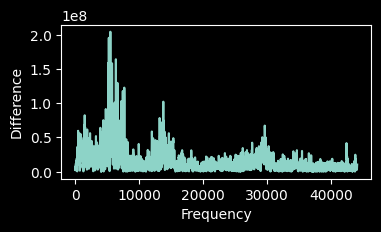

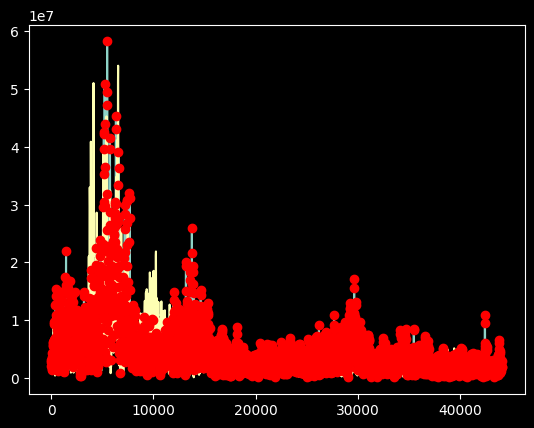

array([   0,    1,    2, ..., 2871, 2872, 2873], shape=(2874,))

In [5]:
# Load
startFile_sample_rate, startFile_wav, startFile_n, startFile_fft = load_plot("./wav/start.wav")

# load mariusz start
startFileMariusz_sample_rate, startFileMariusz_wav, startFileMariusz_n, startFileMariusz_fft = load_plot("./wav/startMariusz.wav")

diff_fft(startFile_fft, startFileMariusz_fft, startFile_sample_rate)

## Stop

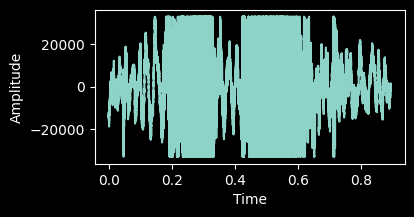

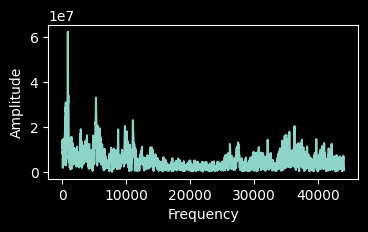

In [6]:
stopFile_sample_rate, stopFile_wav, stopFile_n, stopFile_fft = load_plot("./wav/stop.wav")

## Plus

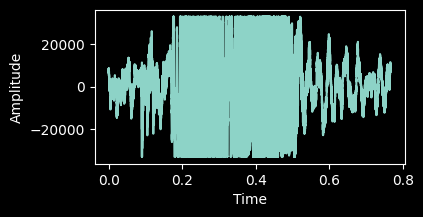

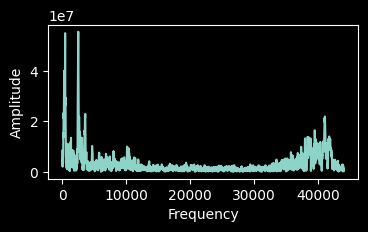

In [7]:
plusFile_sample_rate, plusFile_wav, plusFile_n, plusFile_fft = load_plot("./wav/plus.wav")

## Minus

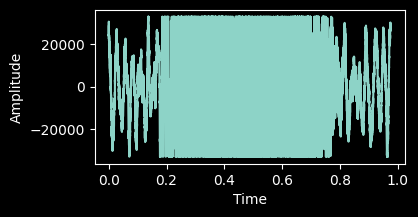

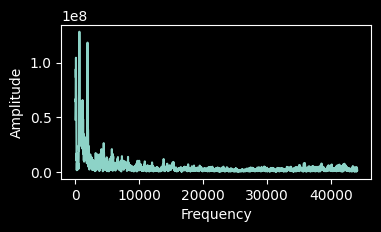

In [8]:
minusFile_sample_rate, minusFile_wav, minusFile_n, minusFile_fft = load_plot("./wav/minus.wav")

476279.1834743479


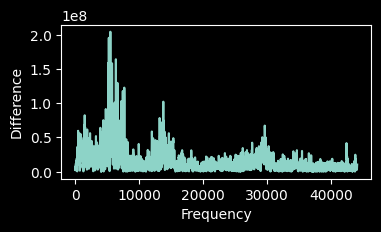

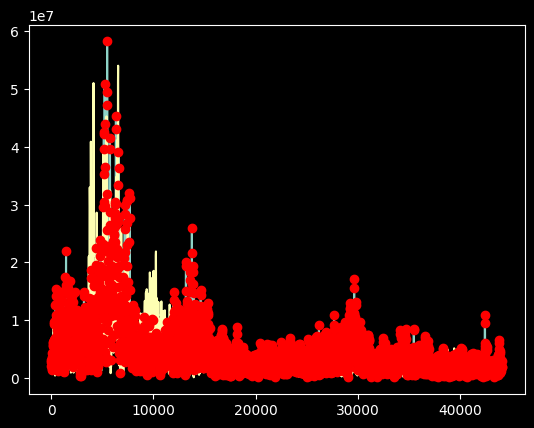

4128501
502700.3514289761


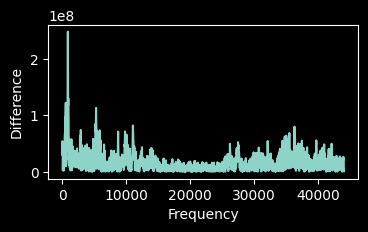

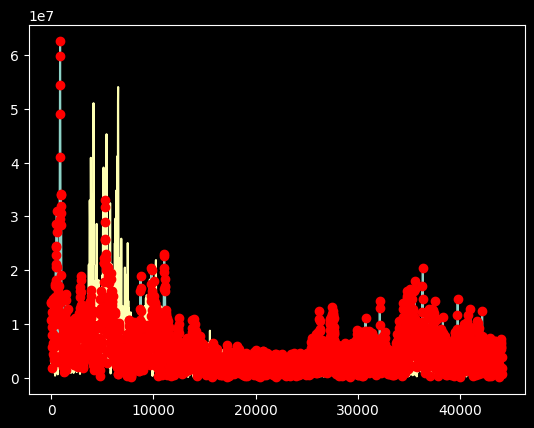

4128501
313560.7794734497


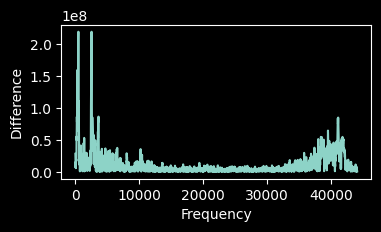

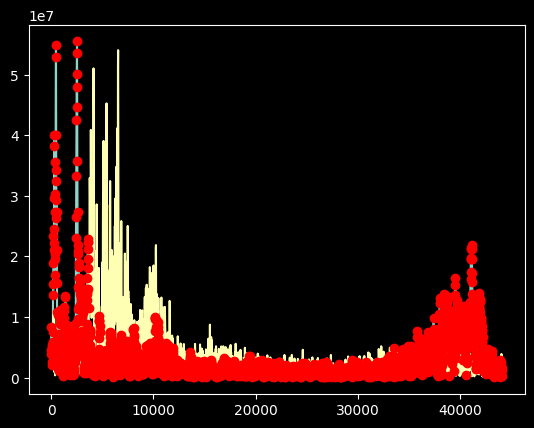

4128501
433216.26206115325


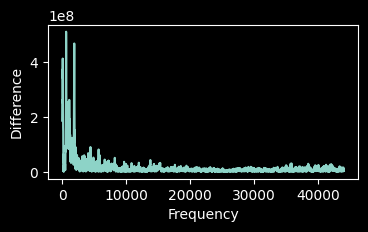

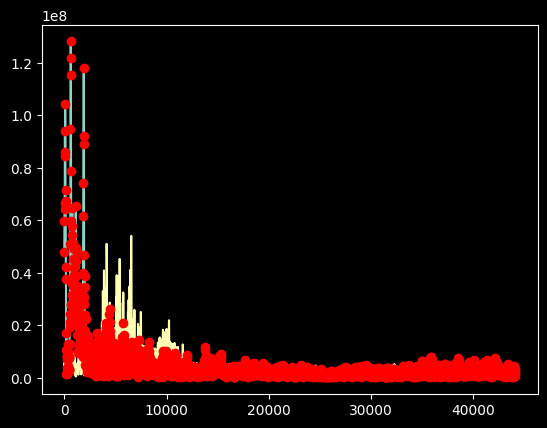

4128501


In [9]:
print(diff_fft(startFile_fft, startFileMariusz_fft, startFile_sample_rate).sum())
print(diff_fft(stopFile_fft, startFileMariusz_fft, startFile_sample_rate).sum())
print(diff_fft(plusFile_fft, startFileMariusz_fft, startFile_sample_rate).sum())
print(diff_fft(minusFile_fft, startFileMariusz_fft, startFile_sample_rate).sum())